In [189]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 

In [190]:
# browser = webdriver.Chrome(executable_path="chromedriver.exe")
# browser = webdriver.Chrome()
# browser.get("https://danso.org/the-gioi/")
# browser.implicitly_wait(20)
# browser.minimize_window()

In [191]:
# html_text = BeautifulSoup(browser.page_source, "html.parser")
# links = html_text.find_all('h3')[:56]

In [192]:
# link_list=[]
# for link in links:
#     link_list+=re.findall("<a href=\"([\w.:/-]+)\">",str(link))

In [193]:
# all_countries={} #keys: countries' names; values: population of countries
# with open("data.tsv",'w') as f:
#     f.write("Country\tYear\tPopulation\tChange\tMigrate\tUrban_resident\n")
#     for link in link_list:
#         # print(link)
#         country_name = re.findall('/([\w-]+)/',str(link))[0]
#         # all_countries[country_name]=[]

#         browser.get(link)
#         browser.implicitly_wait(20)
#         browser.minimize_window()

#         html_text = BeautifulSoup(browser.page_source, "html.parser")
#         lines = html_text.find_all('tr',{'role':'row'})[1:20]
        
#         # print(len(lines[0]))
#         for line in lines:
#             line = re.findall('>([\d,-N.A]+)<',str(line))
#             if len(line) == 10:
#                 line = line[:2] + line[3:5] +line[6:7]
#             else:
#                 line = line[:2] + line[3:5] + line[9:10]

#             if len(line)!=0:
#                 f.writelines(country_name + '\t')
#                 # all_countries[country_name].append(line)
#                 for i in range(len(line)):
#                     f.writelines(line[i]+'\t')
#                 f.write('\n')
  

## DATA  EXPLORATIONS


 ### How many  rows and columns   does the data  have ?

In [194]:
countries={}
with open("data.tsv") as f:
    lines=f.read().split('\n')
    
    keys = lines[0].split('\t')
    for key in keys:
            countries[key]=[]
    
    for line in lines[1:-1]:
        line = line.split('\t')
        
        #add 8 charistics in each lines to each key
        for i in range(len(keys)):
            countries[keys[i]].append((line[i]))

In [195]:
df=pd.DataFrame(countries)

In [196]:
Num_rows = len(countries[keys[1]])
Num_cols=len(keys)
print("The data have: ",Num_rows,"rowls")
print("The data have: ",Num_cols, "columns")
# Duy fix
print(f"The columns are: {list(df.columns)}")

The data have:  1008 rowls
The data have:  6 columns
The columns are: ['Country', 'Year', 'Population', 'Change', 'Migrate', 'Urban_resident']


### What does the data columns mean ?

- Country : Names of countries 
- Year: Display of years    
- Population: Number of people by year
- Change: Number of population changes 
- Migrate: Number of migrants 
- urban_resident: Number of people living in urban areas  

### What data type  does each columns  currently have? Is there  a columns  with a data type that is not  suitable  foe further processing 

- Columns "Country": string is  a valid  data type
- Columns " Year" , "Population" , "Change"," Migrate":  data type current is string , we wil  change from string data type to int 
- The Urban_resident column has an inappropriate value (N.A). Since in those countries there is 100% urban population, we will assign N.A to the population of that country for the year. Finally convert the values in the column to int data type.

In [197]:
for i in range(Num_rows):
    if df.Urban_resident[i]=="N.A.":
        df.Urban_resident[i]=df.Population[i]
df.Urban_resident=df.Urban_resident.apply(lambda x: x.replace(".",''))
df.Urban_resident=df.Urban_resident.apply(lambda x: int(x))
df.Year = df.Year.apply(lambda x : int(x))
df.Population=df.Population.apply(lambda x: x.replace(".",''))
df.Population=df.Population.apply(lambda x: int(x))
df.Change=df.Change.apply(lambda x: x.replace(".",''))
df.Change=df.Change.apply(lambda x: int(x))
df.Migrate=df.Migrate.apply(lambda x: x.replace(".",''))
df.Migrate=df.Migrate.apply(lambda x: int(x))

- In the Country column , We have 56 countries in North America and Asia

In [198]:
Country_array=df.Country.unique()
print("Name Country:")
for i in Country_array:
    print( f'{i},  ' , end='')


Name Country:
bermuda,  canada,  greenland,  hoa-ky,  saint-pierre-va-miquelon,  a-rap-xe-ut,  afghanistan,  an-do,  armenia,  azerbaijan,  bahrain,  bangladesh,  bhutan,  brunei,  cac-tieu-vuong-quoc-a-rap-thong-nhat,  campuchia,  cong-hoa-sip,  dai-loan,  dong-timo,  georgia,  han-quoc,  hong-kong,  indonesia,  iran,  iraq,  israel,  jordan,  kazakhstan,  kuwait,  kyrgyzstan,  lao,  lebanon,  ma-cao,  malaysia,  maldives,  mong-co,  myanmar,  nepal,  nhat-ban,  oman,  pakistan,  palestine,  philippines,  qatar,  singapore,  sri-lanka,  syria,  tajikistan,  thai-lan,  tho-nhi-ky,  trieu-tien,  trung-quoc,  turkmenistan,  uzbekistan,  viet-nam,  yemen,  

- Data distribution table of columns Population , Change , Migrare , Urban_resident
- In the Migrate column , there are negative and positive values . Negative value indicates the migrant countries. Positive value indicates the immigrant countries
- In the Change column , there are negative and positive values. Negative value indicates that the country's population decreases.Positive value indicates that the country's population increases year by year.

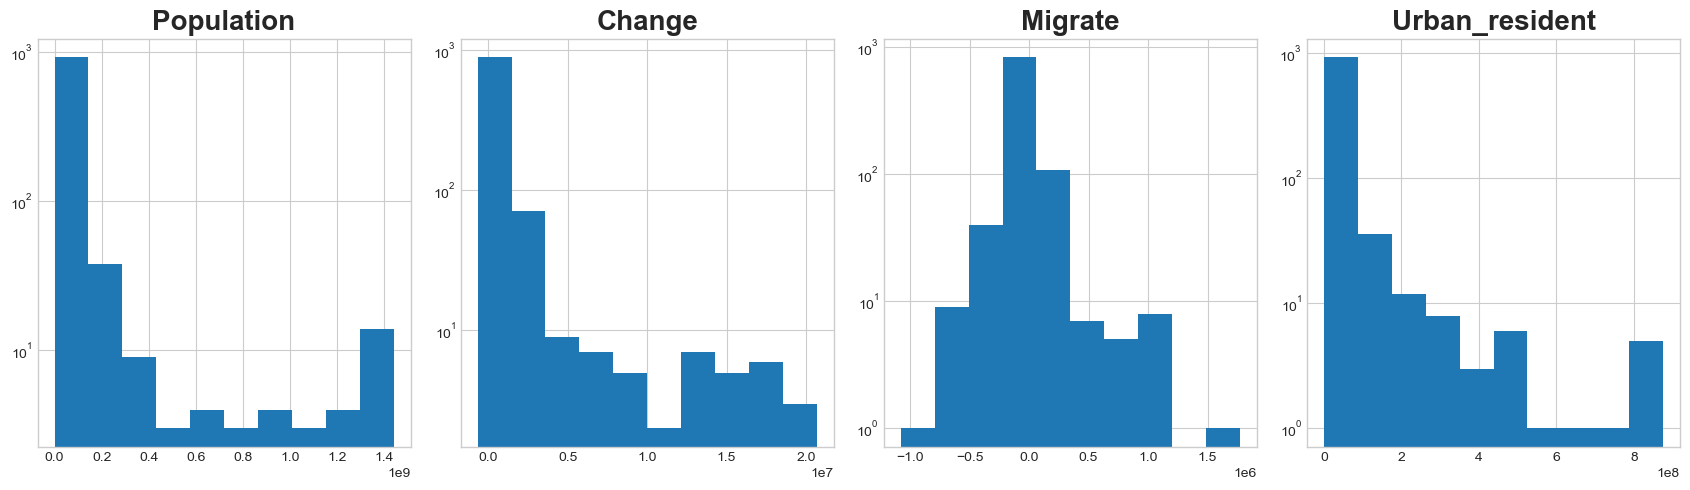

In [199]:
Arrat=df.drop("Country",axis=1)
Arrat=Arrat.drop("Year",axis=1)
fig , axs=plt.subplots(1, len(Arrat.columns), figsize=(17,5))
for i , ax in enumerate(axs.flat):
    ax.hist(Arrat.iloc[:,i] )
    ax.set_title(Arrat.columns[i],fontsize=20,fontweight='bold')
    ax.semilogy()
plt.tight_layout()



-  In the Year column, there are years from 1995 to 2020 and the father is not the same 
- Example from 1955 to 2015, Each data update is 5 years apart. And from 2015 to 2020 they are only 1 year apart.

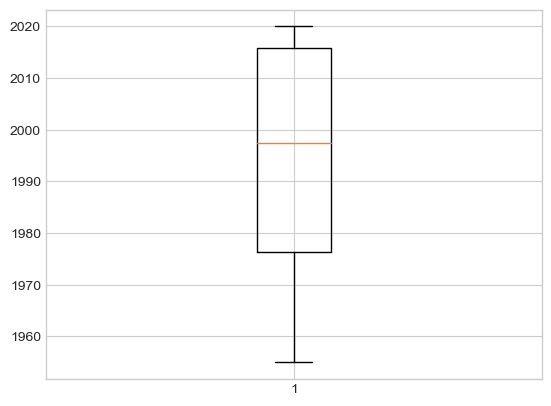

In [200]:
year_arr=df.Year.unique()
plt.boxplot(year_arr)
plt.show()

### Data explor countinue ??

-  Which are immigrant countries and migrant countries

In [201]:
Check=df.groupby('Country').mean()
size=len(Check.index)
Migrant_countries=[]
Immigrant_countries=[]
print("Migrant countries: ", end ="")
for i in range(size):
    if(Check.Migrate[i] < 0):
        # print(f"{Check.index[i]},",end=" ")
        Migrant_countries.append(Check.index[i])

migrantCountries = pd.DataFrame(Migrant_countries)
print(migrantCountries)

print("\n")
print("Immigrant countries: ", end ="")
for i in range(size):
    if(Check.Migrate[i] > 0):
        # print(f"{Check.index[i]},",end=" ")
        Immigrant_countries.append(Check.index[i])

immigrantCountries = pd.DataFrame(Immigrant_countries)
print(immigrantCountries)


Migrant countries:                0
0    afghanistan
1          an-do
2        armenia
3     azerbaijan
4     bangladesh
5         bhutan
6      campuchia
7      dong-timo
8        georgia
9      indonesia
10          iraq
11    kazakhstan
12    kyrgyzstan
13           lao
14       mong-co
15       myanmar
16         nepal
17      pakistan
18     palestine
19   philippines
20     sri-lanka
21         syria
22    tajikistan
23    trieu-tien
24    trung-quoc
25  turkmenistan
26    uzbekistan
27      viet-nam
28         yemen


Immigrant countries:                                        0
0                            a-rap-xe-ut
1                                bahrain
2                                bermuda
3                                 brunei
4   cac-tieu-vuong-quoc-a-rap-thong-nhat
5                                 canada
6                           cong-hoa-sip
7                               dai-loan
8                               han-quoc
9                                 hoa-

- Migration rate of countries in the region over the year => Find top 3 immigrant/migrant countries

In [202]:
KQ=[0 for i in range(1008)]
Migrant_DTF=df.loc[df.Country==Country_array[0],["Country","Population","Migrate"]]
for i in range(1,len(Country_array)):
    temp=df.loc[df.Country==Country_array[i],["Country","Population","Migrate"]]
    Migrant_DTF= pd.concat([Migrant_DTF,temp])  
Migrant_DTF.index=range(1,len(Migrant_DTF)+1)
for i in range(1,len(Migrant_DTF)):
    KQ[i-1]=(Migrant_DTF.Migrate[i] / Migrant_DTF.Population[i] )*1000
KQ_dict=pd.DataFrame(data=KQ,columns=['TB'])
KQ_dict.index=range(1,len(KQ_dict)+1)
Migrant_DTF= pd.concat([Migrant_DTF,KQ_dict],axis=1) 
Migrant_DTF=Migrant_DTF.drop('Population',axis=1)
Migrant_DTF=Migrant_DTF.drop('Migrate',axis=1)
Migrant_DTF=Migrant_DTF.groupby('Country').mean()
Migrant_DTF=Migrant_DTF.sort_values("TB",ascending=False)
print("Top 3 Immigrant countries:")
print(Migrant_DTF.head(3))
print('\n')
print("Top 3 Migrant countries:")
print(Migrant_DTF.tail(3))

Top 3 Immigrant countries:
                                             TB
Country                                        
qatar                                 30.756632
cac-tieu-vuong-quoc-a-rap-thong-nhat  30.201535
bermuda                               20.000191


Top 3 Migrant countries:
                    TB
Country               
afghanistan  -4.504909
palestine    -7.939633
syria       -11.242004


- Average population growth rate of countries from 1955 to 2020 year

In [203]:
Grow_rate=[]
for i in Country_array:
    total=0
    Temp_array=df.loc[df.Country==i,["Year" ,"Country","Population"]]
    Temp_array=Temp_array.sort_values("Year",ascending=False)
    Temp_array.index=range(1,len(Temp_array)+1)
    for i in range(1,len(Temp_array)-1):
        Pop_Now=Temp_array.Population[i]
        Pop_Last=Temp_array.Population[i+1]
        Year_Now=Temp_array.Year[i]
        Year_last=Temp_array.Year[i+1]
        total= total+ ( (Pop_Now / Pop_Last )-1)*(Year_Now-Year_last)
    total=(total/(Temp_array.Year[1] -Temp_array.Year[len(Temp_array)]))*100
    Grow_rate.append(total)
Aver_Grow_rate=pd.DataFrame(data=Country_array,columns=['Country'])
Temp1=pd.DataFrame(data=Grow_rate,columns=["Average Population growth rate"])
Aver_Grow_rate=pd.concat([Aver_Grow_rate,Temp1],axis=1)
print(Aver_Grow_rate.head(5))

                    Country  Average Population growth rate
0                   bermuda                        2.727246
1                    canada                        5.660972
2                 greenland                        4.906293
3                    hoa-ky                        4.319774
4  saint-pierre-va-miquelon                        1.475380


- The most/least populous country in area in each year

In [204]:
year_arr=np.sort(year_arr)
Max_Population=[]
Min_Population=[]
for i in year_arr:
    Data_Population=df.loc[df.Year==i,["Country","Population" ]]
    Data_Population=Data_Population.sort_values("Population",ascending=False)
    Data_Population.index=range(1,len(Data_Population)+1)
    if Data_Population.Country[1] not in Max_Population:
        Max_Population.append(Data_Population.Country[1]) 
    if Data_Population.Country[len(Data_Population)] not in  Min_Population:
        Min_Population.append(Data_Population.Country[len(Data_Population)])

print("The most populous country: " , end="")
for i in Max_Population:
    print(i)
print("The least populous country: " , end="")
for i in Min_Population:
    print(i)

The most populous country: trung-quoc
The least populous country: saint-pierre-va-miquelon


- Calculate average population of countries in a period

In [205]:
Ave_Population=df[["Country","Population"]]
Ave_Population=Ave_Population.groupby("Country").mean()
print(Ave_Population.head(5))

               Population
Country                  
a-rap-xe-ut  1.974312e+07
afghanistan  2.237552e+07
an-do        9.649575e+08
armenia      2.822521e+06
azerbaijan   7.530070e+06


## BUILDING MODEL
---

#### Step 1: Let's explore some infomations from data of column population and year of the data frame before bulding model.

Choice the bermuda country for some explores.

In [206]:
bermudaInfo = df.loc[df.Country == 'bermuda']
bermudaInfo.head(5)

,Country,Year,Population,Change,Migrate,Urban_resident
0,bermuda,2019,62506,-250,1250,60833
1,bermuda,2018,62756,-293,1255,61070
2,bermuda,2017,63049,-313,1261,61349
3,bermuda,2016,63362,-330,1267,61666
4,bermuda,2015,63692,-339,1274,62003


In [207]:
bermudaInfo1 = bermudaInfo[['Year','Population']]
bermudaInfo1.head(5)

,Year,Population
0,2019,62506
1,2018,62756
2,2017,63049
3,2016,63362
4,2015,63692


Type of data.

In [208]:
bermudaInfo1 = bermudaInfo1.sort_values('Year')
bermudaInfo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 16 to 17
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        18 non-null     int64
 1   Population  18 non-null     int64
dtypes: int64(2)
memory usage: 432.0 bytes


Find some importion values of population and year in bermuda country.

In [209]:
bermudaInfo1.describe()

,Year,Population
count,18.000000,18.000000
mean,1994.166667,58866.222222
std,22.350813,7399.920783
min,1955.000000,40708.000000
25%,1976.250000,55943.250000
50%,1997.500000,62392.000000
75%,2015.750000,63422.000000
max,2020.000000,66257.000000


Visualize the data of bermuda country.

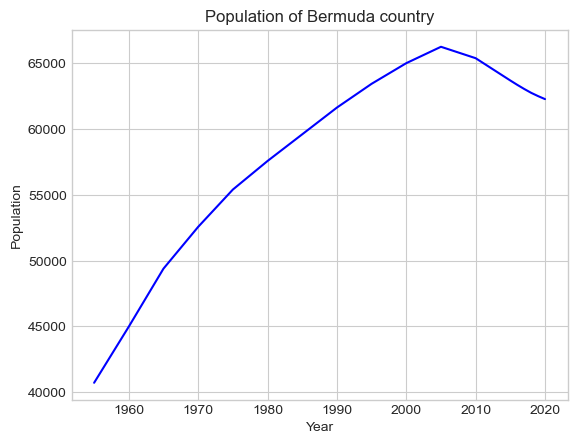

In [210]:
plt.style.use('seaborn-whitegrid')
xIndex = np.array(bermudaInfo1.Year)
xIndex = [i for i in xIndex]
yIndex = np.array(bermudaInfo1.Population)
yIndex = [j for j in yIndex]
plt.plot(xIndex,yIndex, color = 'blue');
plt.title(f"Population of Bermuda country")
plt.xlabel("Year");
plt.ylabel("Population");

#### Step 2: After exploring we start finding insight of data given and build model.

##### - We will build the model that can predict population of the country in the future and we use linear regression method to build.

- Using model: `y = a_0*x^0 + a_1*x^1 + ..... + a_n*x^n.`

- Caculate a (a_0, a_1, .... a_n) by using the formula: `(A^T * A)^-1 * A^T *B.`

        With:
            A = [theta_0...theta_n]  :list years.
                [theta_0...theta_n]
                [  .         .    ]
                [  .         .    ]
                [theta_0...theta_n]
            Size of A: m nows x n + 1 columns.
            Ex: If we have list years: 2011 2012 2013 2014 (m = 4) and n is 2, A will be:
                [2011^0 2011^1 2011^2]
                [2012^0 2012^1 2012^2]
                [2013^0 2013^1 2013^2]
                [2014^0 2014^1 2014^2]

            B = [y0]  :list values of field.
                [y1]
                [. ]
                [. ]
                [yn]
            Size of B: m nows x 1 columns.
            Ex: If we have list years: 2011 2012 2013 2014 and population for each year is: 100 200 300 400 (m = 4), B will be:
                [100]
                [200]
                [300]
                [400]
                    
- Calculate the residual value using the formula: `||r|| = ||A*x – B||.`

        With:
            x = (A^T * A)^-1 * A^T *B
              = [a_0]
                [a_1]
                [ . ]
                [ . ]
                [a_n]

### Model: Build model base on the formula given, main idea is using year field to predict another fields in data.
---

#### Build processing.

- Prepare data for caculation by the way give list values of field and year from data frame.</br>
    - Input: data frame, name of country and field of data you want to predict.</br>
    - Output: data for predict processing.</br>

In [211]:
def prepareDataForCalculate(country,dataFrame,field):
    countryInfo = dataFrame.loc[(dataFrame.Country == country),['Year',field]]
    countryInfo = countryInfo.sort_values('Year')
    # Change data for suitable to caculate
    xIndex = np.array(countryInfo.Year)
    yIndex = np.array(countryInfo[field])
   
    return xIndex, yIndex

- Give data and remake data for using formula to caculate meaningful values.</br>
    - Input: data for processing and max pow of x varible in function f(x).</br>
    - Output: vecter A, vecter B and thetahat vecter for caculate the residual value of model.</br>

In [212]:
def calValueForModel(xIndex,yIndex,powN):
    powN = int(powN)
    size = len(xIndex)
    A = xIndex.reshape(-1,1)
    root = np.copy(A)
    x0Index = np.ones(len(xIndex))

    x0Index= x0Index.reshape(-1,1)
    A = np.append(x0Index,A,axis=1)

    yIndex = yIndex.reshape(-1,1)

    for i in range(2,powN+1):
        xJ = np.ones(size)
        xJ = xJ.reshape(-1,1)
        for j in range(i):
            xJ = np.array(xJ*root)
        A = np.append(A,xJ,axis=1)

    B = np.array(yIndex)
    # Caculate parameters
    thetaHat = np.linalg.inv(A.T@A)@(A.T@B)
    return A,B, thetaHat

- Caculate the residual value of model
    - Input: vecter A, vecter B and thetahat vecter.
    - Output: the residual value of model.

In [213]:
def caculateNormR(A, B, thetaHat):
    R = np.linalg.norm(A@thetaHat - B)
    return R

- Build model by using functions had been built. Main point is find R and x that is mention of formula.

In [214]:
def buildModelField(country,dataFrame,field,powN):
    xIndex, yIndex = prepareDataForCalculate(country,dataFrame,field)
    A,B, thetaHat = calValueForModel(xIndex,yIndex,powN)
    R = caculateNormR(A, B, thetaHat)
    return thetaHat, R

- Find the best rank of model when using maximum of n is 45, that is decision by residual value (R). So, the target of 
this function is finding minimum R then return the rank at minimum R.

In [215]:
def findTheBestNForMinRField(country,field,dataFrame):
    # The maximum size that computer can caculate. 
    maxSize = 45
    rArray = []
    for i in range(1,maxSize):
        theta, R = buildModelField(country,dataFrame,field,i)
        rArray.append(R)
    rArray = np.array(rArray)
    minValue = np.amin(rArray)
    minPos = np.where(rArray == minValue)
    minPos = np.amin(minPos)

    return minPos, minValue

- Print infomation of field you want to predict and give some evaluations about model will be built.

In [216]:
def printInfoField(country,field,powN,minR):
    print(f"Predict {field} for {country} country.")
    print(f"The minimum value of R is: {minR}, and N (maximum power of x) is: {powN}.")
    print(f"The above information means that the {field} deviation when using the X^({powN}) model to predict is from real data.")

- Caculate value of y (the function given initially) after finding all variable.
    - Input: list of year, array of thetahat vecter.
    - Output: value of y.

In [217]:
def caculateFieldForYear(array,year):
    arrayUse = array.reshape(-1)
    yearUse = float(year)
    temp = np.copy(arrayUse[0])
    sumP  = temp
    for i in range(1,len(arrayUse)):
        sumP = sumP + float((np.power(yearUse,i))*float(arrayUse[i]))
    return sumP

- Predict field base on model. Using functions having been built, step by step create model and then caculate value.

In [218]:
def predictField(country,field,dataFrame,year,powN):
    theta, R = buildModelField(country,dataFrame,field,powN)
    large = round(caculateFieldForYear(theta,year))
    print(f"- The {field} of {country} in {year} is: {float(large)}, the residual is: {R}.")

- Visualize for comparing predict model had been built with real data. 

In [219]:
def compareModelWithRealData(array,listYear,listYReal, countryName):
    array = array.reshape(-1)
    listPop = np.zeros(len(listYear))
    temp = np.copy(array[0])

    for index in range(len(listYear)):
        sumPop = temp
        for i in range(1,len(array)):
            sumPop = sumPop + float(np.power(listYear[index],i)*float(array[i]))
        listPop[index] = sumPop
        
    plt.plot(listYear,listPop, color = 'red', label = 'Predict model.');
    plt.scatter(listYear,listYReal, color = 'blue', label = 'Real data.');
    plt.xlabel("Year");
    plt.ylabel("Population");
    plt.title(f"Comprare chart of {countryName} country")
    plt.legend(); 

- Synthetic informations for comparing predict model with real data.  

In [220]:
def compareFieldWithRealData(country,field,dataFrame,powN):
    listX, listY = prepareDataForCalculate(country,dataFrame,field)
    theta, R = buildModelField(country,dataFrame,field,powN)
    compareModelWithRealData(theta,listX,listY,country)


##### Testing model.

- Prepare data.

In [221]:
listField = list(df.columns)
listField

['Country', 'Year', 'Population', 'Change', 'Migrate', 'Urban_resident']

In [222]:
listCountry = df.Country.unique()
listCountry = [i for i in listCountry]
print(listCountry)

['bermuda', 'canada', 'greenland', 'hoa-ky', 'saint-pierre-va-miquelon', 'a-rap-xe-ut', 'afghanistan', 'an-do', 'armenia', 'azerbaijan', 'bahrain', 'bangladesh', 'bhutan', 'brunei', 'cac-tieu-vuong-quoc-a-rap-thong-nhat', 'campuchia', 'cong-hoa-sip', 'dai-loan', 'dong-timo', 'georgia', 'han-quoc', 'hong-kong', 'indonesia', 'iran', 'iraq', 'israel', 'jordan', 'kazakhstan', 'kuwait', 'kyrgyzstan', 'lao', 'lebanon', 'ma-cao', 'malaysia', 'maldives', 'mong-co', 'myanmar', 'nepal', 'nhat-ban', 'oman', 'pakistan', 'palestine', 'philippines', 'qatar', 'singapore', 'sri-lanka', 'syria', 'tajikistan', 'thai-lan', 'tho-nhi-ky', 'trieu-tien', 'trung-quoc', 'turkmenistan', 'uzbekistan', 'viet-nam', 'yemen']


Now, let's make some predictions with canada.

- Check the quality of the model.

In [223]:
powFieldValue, minRFieldValue = findTheBestNForMinRField(listCountry[1],listField[5],df)
printInfoField(listCountry[1],listField[2],powFieldValue, minRFieldValue)

Predict Population for canada country.
The minimum value of R is: 1007910.3885132923, and N (maximum power of x) is: 2.
The above information means that the Population deviation when using the X^(2) model to predict is from real data.


- Predict population of canada in 2019.

In [224]:
predictYear = 2019
predictField(listCountry[1],listField[2],df,predictYear,powFieldValue)

- The Population of canada in 2019 is: 37318722.0, the residual is: 1002864.9460018079.


- Compare real data with predict's model data.

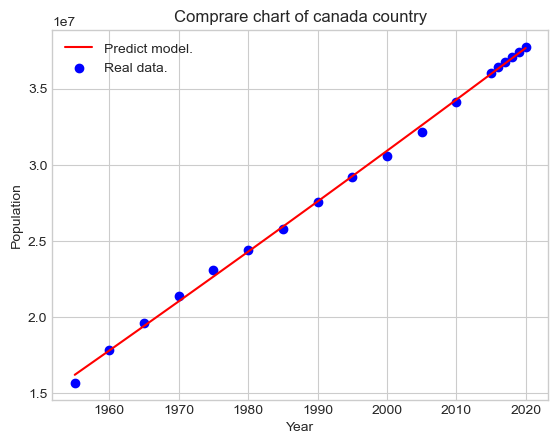

In [225]:
compareFieldWithRealData(listCountry[1],listField[2],df,powFieldValue)

### Using scikitlearn model
---


#### **<font color='blue'>Model 1.0</font>**. Choose one of two models: multi linear regression or polynomial regresion based on the prediction results of the two models on the data set.

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import mean_squared_error


- Prepare data for multi linear regression model.

In [227]:
def getDataForMTLinear(countryName,fieldPredict,listField):
    listData = []
    for i in listField:
        if i != fieldPredict:
            listData.append(i)

    result = df.loc[(df.Country == countryName),fieldPredict]
    data = df.loc[(df.Country == countryName),listData]
    data = data.drop(['Country'],axis = 1)

    return data, result

- Prepare data for polynomial regression model.

In [228]:
def getDataForPLLinear(countryName,fieldPredict,fieldData):
    result = df.loc[(df.Country == countryName),fieldPredict]
    data = df.loc[(df.Country == countryName),fieldData]

    return data, result


In [229]:
print(listCountry)

['bermuda', 'canada', 'greenland', 'hoa-ky', 'saint-pierre-va-miquelon', 'a-rap-xe-ut', 'afghanistan', 'an-do', 'armenia', 'azerbaijan', 'bahrain', 'bangladesh', 'bhutan', 'brunei', 'cac-tieu-vuong-quoc-a-rap-thong-nhat', 'campuchia', 'cong-hoa-sip', 'dai-loan', 'dong-timo', 'georgia', 'han-quoc', 'hong-kong', 'indonesia', 'iran', 'iraq', 'israel', 'jordan', 'kazakhstan', 'kuwait', 'kyrgyzstan', 'lao', 'lebanon', 'ma-cao', 'malaysia', 'maldives', 'mong-co', 'myanmar', 'nepal', 'nhat-ban', 'oman', 'pakistan', 'palestine', 'philippines', 'qatar', 'singapore', 'sri-lanka', 'syria', 'tajikistan', 'thai-lan', 'tho-nhi-ky', 'trieu-tien', 'trung-quoc', 'turkmenistan', 'uzbekistan', 'viet-nam', 'yemen']


In [230]:
listField

['Country', 'Year', 'Population', 'Change', 'Migrate', 'Urban_resident']

##### Now, we try to use model to predict population in canada country.

Multi linear regression.

- Prepare data.

In [231]:
needPredict = listField[2]
countryPredict = listCountry[1]

In [232]:
data, result = getDataForMTLinear(countryPredict ,needPredict,listField)

In [233]:
X = data.iloc[:,:].values
y = result.iloc[:].values
X2 = np.array(np.copy(X))
yearTest = np.copy(X2[:,0])

- Split data to training and testing set.

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

- Scale data so that the data is close to each other.

In [235]:
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])
X2[:,:] = sc.transform(X2[:,:])

- Fit data in model.

In [236]:
lR = LinearRegression()
lR.fit(X_train, y_train)

LinearRegression()

- Evaluate the model on the training set.

In [237]:
lR.score(X_train, y_train)

0.9480977475525618

In [238]:
y_preds = lR.predict(X_test)

In [239]:
y_test = np.array(y_test)

- Evaluate the model on predicting.

In [240]:
np.sqrt(mean_squared_error(y_test,y_preds))

4583418.606281839

- Convert data to visualize in chart.

In [241]:
def convertDataToVisualize(y_preds,y_test,yearTest):
    y_preds = np.array(y_preds).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)
    yearTest = np.array(yearTest).reshape(-1,1)
    compareData = np.append(yearTest,y_test,axis=1)
    compareData = np.append(compareData,y_preds,axis=1)
    compareData = pd.DataFrame(compareData,columns = ['Year','Predict','Real'])
    compareData = compareData.sort_values('Year')

    return compareData

In [242]:
y_preds_all = lR.predict(X2)
compareData = convertDataToVisualize(y_preds_all,y,yearTest)

- Visualize data for model.

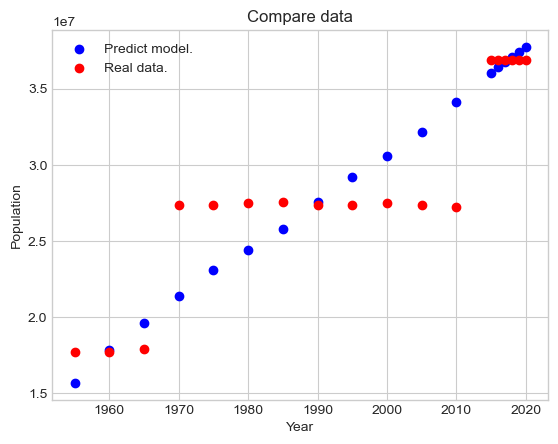

In [243]:
plt.scatter(compareData.Year,compareData.Predict, color = 'blue', label = 'Predict model.');
plt.scatter(compareData.Year,compareData.Real, color = 'red', label = 'Real data.');
plt.title('Compare data')
plt.xlabel("Year");
plt.ylabel("Population");
plt.legend(); 

Polynomial regression.

- Prepare data.

In [244]:
listField

['Country', 'Year', 'Population', 'Change', 'Migrate', 'Urban_resident']

In [245]:
needPredict = listField[2]
countryPredict = listCountry[1]
dataField = listField[1]

In [246]:
data1, result1 = getDataForPLLinear(countryPredict,needPredict,dataField)

X2 = np.copy(data1)
y = np.copy(result1)
X2 = np.array(X2).reshape(-1,1)
y = np.array(y).reshape(-1,1)

- Transform then split data to training and test set.

In [247]:
poly_reg = PolynomialFeatures(degree = 2) #Random degree
X_poly = poly_reg.fit_transform(X2)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 1)

- Fit data in model.

In [248]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

- Evaluate the model on the training set.

In [249]:
lin_reg_2.score(X_poly_train, y_train)

0.9993302473276765

In [250]:
yPolyPreds = lin_reg_2.predict(X_poly_test)

- Evaluate the model on predicting.

In [251]:
np.sqrt(mean_squared_error(y_test,yPolyPreds))

326712.285812183

- Visualize data for model.

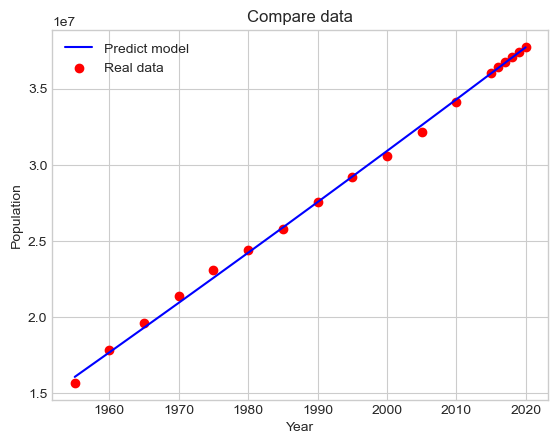

In [252]:
yPolyPredsAll = lin_reg_2.predict(X_poly)
plt.scatter(X2, y, color = 'red',label = 'Real data' )
plt.plot(X2, yPolyPredsAll, color = 'blue', label = 'Predict model')
plt.title('Compare data')
plt.xlabel(dataField)
plt.ylabel(needPredict)
plt.legend()
plt.show()

- <font color='Orange'>Comment on 2 machine learning models:</font>

We see that the results of multi linear regression for population prediction are not really good, the error is still quite large. Polynomial regresion gives better results, but the results are mainly based on the fields and degrees that we use to build the model. So to continue we will use model 2 but first we need to find the appropriate data field and order and then build the model.

#### **<font color='blue'>Model 2.0</font>**. Build polynomial regression model.

We try to find the field to predict by using cross validation (**<font color='green'>y = a_0 + a_i*x_i</font>**), then we use the best field to find the best degree by using the residual to evaluate the best field.

- Caculate data to find R and thetahat vector.

In [253]:
def findRAndTheta(fieldData, fieldResult):
    thetaHat = np.linalg.inv(fieldData.T@fieldData)@(fieldData.T@fieldResult)
    rValue = np.linalg.norm(fieldData@thetaHat - fieldResult)
    return rValue, thetaHat

- Find expand vector by degree.

In [254]:
def calValueForModel2(fieldData,fieldResult,powN):
    
    powN = int(powN)
    size = len(fieldData)
    A = np.array(np.copy(fieldData))
    root = np.copy(A)
    x0Index = np.ones(len(fieldData))

    x0Index= x0Index.reshape(-1,1)
    A = np.append(x0Index,A,axis=1)

    for i in range(2,powN+1):
        xJ = np.ones(size)
        xJ = xJ.reshape(-1,1)
        for j in range(i):
            xJ = np.array(xJ*root)
        A = np.append(A,xJ,axis=1)
    
    expandVector = np.array(np.copy(A))
    B = np.array(np.copy(fieldResult))
    rValue, thetaHat = findRAndTheta(A,B)

    return rValue, thetaHat, expandVector

- Find the best column field for predict field.

In [255]:
def findTheBestField(dataFrame,countryName,listField,fieldResult):
    
    countryInfo = dataFrame.loc[(dataFrame.Country == countryName)]
    result = np.array(countryInfo[fieldResult],dtype=float).reshape(-1,1)
    scoreArray = []
    choiceField = []
    for i in listField:
        if i != 'Country' and i != fieldResult:
            data = np.array(countryInfo[i],dtype=float).reshape(-1,1)
            R,thetaHat,expandVector = calValueForModel2(data,result,1)
            choiceField.append(i)
            lin_reg_2 = LinearRegression()
            expandVectorTrain, expandVectorTest, result_train, result_test = train_test_split(expandVector, result, test_size = 0.3, random_state = 1)
            lin_reg_2.fit(expandVectorTrain, result_train)
            score = lin_reg_2.score(expandVectorTrain, result_train)
            poly_reg_rmse = np.sqrt(mean_squared_error(result_test, lin_reg_2.predict(expandVectorTest)))
            rs = float((poly_reg_rmse + R + score)/3)
            scoreArray.append(rs)

    scoreArray = np.array(scoreArray)
    minValue = np.amin(scoreArray)
    minPos = np.where(scoreArray == minValue)
    minPos = np.amin(minPos)

    return countryInfo, minValue, fieldResult, choiceField[minPos], result
        

- Find the best degree for the best field.

In [256]:
def findParameter(dataFrame,countryName,listField,fieldResult):
        
    countryInfo, minR, fieldResult, bestField, result = findTheBestField(dataFrame,countryName,listField,fieldResult)
    data = np.array(countryInfo[bestField],dtype=float).reshape(-1,1)
    maxSize = 10
    scoreArray = []
    thetaArray = []
    powArray = []
    trainScore = []
    listExpandVector = []

    for i in range(1,maxSize):
        rValue, thetaHat, expandVector = calValueForModel2(data,result,i)
        thetaArray.append(thetaHat)
        powArray.append(i)
        listExpandVector.append(expandVector)
        lin_reg_2 = LinearRegression()
        y = np.array(np.copy(result))
        expandVectorTrain, expandVectorTest, y_train, y_test = train_test_split(expandVector, y, test_size = 0.3, random_state = 1)
        lin_reg_2.fit(expandVectorTrain, y_train)
        score = lin_reg_2.score(expandVectorTrain, y_train)
        poly_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_2.predict(expandVectorTest)))
        rs = float((poly_reg_rmse + rValue + score)/3)
        trainScore.append(score)
        scoreArray.append(rs)
           
    scoreArray = np.array(scoreArray)
    minValue = np.amin(scoreArray)
    minPos = np.where(scoreArray == minValue)
    minPos = np.amin(minPos)

    return bestField, minValue, trainScore[minPos], thetaArray[minPos], powArray[minPos], listExpandVector[minPos], data, result

- Build polynomial regression model.

In [257]:
def polyResgressionBuilt(data,result,expandVector):
    
    X0 = np.copy(data)
    X0 = np.array(X0).reshape(-1,1)
    X = np.array(np.copy(expandVector))
    y = np.copy(result)
    y = np.array(y).reshape(-1,1)
    lin_reg_2 = LinearRegression()
    X_poly_train, X_poly_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    lin_reg_2.fit(X_poly_train, y_train)
    Evaluate = lin_reg_2.score(X_poly_train, y_train)
    
    return X0, y, lin_reg_2.predict(X), Evaluate

    

- Visualize data for model.

In [258]:
def visualizeDataForPoly(X,y,yPreds,fieldPredict,fieldWantToPredict):
        
        plt.scatter(X, y, color = 'red', label = 'Real data' )
        plt.plot(X, yPreds, color = 'blue', label = 'Predict model')
        plt.title('Compare data')
        plt.xlabel(fieldPredict)
        plt.ylabel(fieldWantToPredict)
        plt.legend()
        plt.show()

- Execute

Prepare data.

In [259]:
print(listCountry)

['bermuda', 'canada', 'greenland', 'hoa-ky', 'saint-pierre-va-miquelon', 'a-rap-xe-ut', 'afghanistan', 'an-do', 'armenia', 'azerbaijan', 'bahrain', 'bangladesh', 'bhutan', 'brunei', 'cac-tieu-vuong-quoc-a-rap-thong-nhat', 'campuchia', 'cong-hoa-sip', 'dai-loan', 'dong-timo', 'georgia', 'han-quoc', 'hong-kong', 'indonesia', 'iran', 'iraq', 'israel', 'jordan', 'kazakhstan', 'kuwait', 'kyrgyzstan', 'lao', 'lebanon', 'ma-cao', 'malaysia', 'maldives', 'mong-co', 'myanmar', 'nepal', 'nhat-ban', 'oman', 'pakistan', 'palestine', 'philippines', 'qatar', 'singapore', 'sri-lanka', 'syria', 'tajikistan', 'thai-lan', 'tho-nhi-ky', 'trieu-tien', 'trung-quoc', 'turkmenistan', 'uzbekistan', 'viet-nam', 'yemen']


In [260]:
listField

['Country', 'Year', 'Population', 'Change', 'Migrate', 'Urban_resident']

Choose field and country that you want to predict.

In [261]:
countryWantToPredict = listCountry[1]
fieldWantToPredict = listField[2]
print(fieldWantToPredict + ' in ' + countryWantToPredict)

Population in canada


Get the best field and parameter for predicting.

In [262]:
bestFieldForPreds, minAveScore, trainScore, theta, bestDegree, expandVector, data, result = findParameter(df,countryWantToPredict,
listField,fieldWantToPredict)

Get result after model processing.

In [263]:
X, y1, y1Preds, evaluation = polyResgressionBuilt(data,result,expandVector)

- Details of model.

In [264]:
evaluationModel = pd.DataFrame([fieldWantToPredict,bestFieldForPreds, bestDegree, trainScore, minAveScore], columns = ['Result'], 
index=['Field want to predict', 'Suitable field', 'Degree', 'Evaluate the model on training set', 
'Evaluate the model on predicting ave (RMSE,R,Score)'])
evaluationModel

,Result
Field want to predict,Population
Suitable field,Urban_resident
Degree,3
Evaluate the model on training set,0.999415
"Evaluate the model on predicting ave (RMSE,R,Score)",340153.511817


- Visualization result.

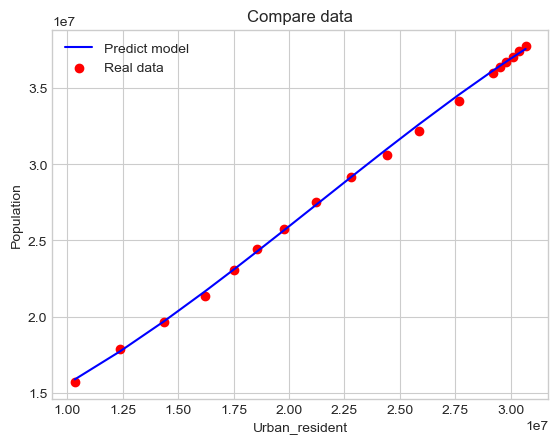

In [265]:
visualizeDataForPoly(X,y1,y1Preds,bestFieldForPreds,fieldWantToPredict)